# <big><font color='#D35400'>CARGA DE ARCHIVOS .CSV, CONTROL DE CALIDAD Y VISUALIZACION DE DATOS UTILIZANDO PANDAS Y SEABORN</font></big>
##  INDEX
####  1.[CARGA DE DATOS](#carga)
####  2.[VISUALIZACION DE DATOS](#visualizacion)  

Python necesita que importemos las librerías para poder utilizarlas (pandas, plotly, etc). Para trabajar mejor, es preferible importarlas todas en la primer celda del notebook.<br>
En el caso de necesitar una librería que no hayamos importado, es conveniente agregala a esta celda y volver a correrla, en lugar de correrla en una celda cualquiera del notebook, ya que fácilmente llegamos a un punto de tener que buscar la celda para poder importar esa/s librería/s. 

In [342]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import fnmatch
import re
import glob
import os
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

<a id='carga'></a>
# <font color='#8E44AD'>CARGA DE DATOS UTILIZANDO ARCHIVOS .CSV</font>
En esta oportunidad vamos a cargar la información almacenada en archivos **csv** con datos de producción de hidrocarburos de Argentina. Los mismo pueden ser descargados desde aquí:
https://datos.gob.ar/dataset/energia-produccion-petroleo-gas-por-pozo-capitulo-iv
## <font color=' #D35400'>REVISAMOS TODOS LOS ARCHIVOS .csv EN LA CARPETA</font>

In [3]:
path=input("Escriba el PATH completo de la carpeta que contiene los .CSV y presione ENTER.(Ejemplo:'D:\Pablo\Python\working_files')")

clear_output(wait=True)
# D:\Pablo\Python\working_files
for file in os.listdir(path):
    if file.endswith(".csv"):
        print(os.path.join(file))

listado-de-pozos-cargados-por-empresas-operadoras.csv
produccin-de-pozos-de-gas-y-petrleo-2018.csv
produccin-de-pozos-de-gas-y-petrleo-2019.csv
produccin-de-pozos-de-gas-y-petrleo-2020.csv
produccin-de-pozos-de-gas-y-petrleo-2021.csv


## <font color=' #D35400'>ELEGIMOS LOS .csv CON LOS QUE VAMOS A TRABAJAR</font>
(En este caso elegiremos los archivos **produccin-de-pozos-de-gas-y-petrleo-2018.csv** y **produccin-de-pozos-de-gas-y-petrleo-2019.csv** introduciendo el texto *produccin-de-pozos-de-gas-y-petrleo-201* como primeras letras/numeros)


In [4]:
if 'csv_file_list' in locals():
    del csv_file_list
else:
    csv_file_list = []

csv_file_list = []   
csv_file = []


pozo_nomb_comienzo=input("Escriba las primeras letras/numeros de los Pozos con los que va a trabajar y presione ENTER,si va a utilizar todos los .CSV de la carpeta, solo presione ENTER")

clear_output(wait=True)

for file in os.listdir(path):
    if file.endswith('.csv') and file.startswith((pozo_nomb_comienzo.lower(),pozo_nomb_comienzo.upper(),pozo_nomb_comienzo.capitalize())):
        csv_file_list.append(path+"\\"+file)
        csv_file.append(file)
csv_file_list

['D:\\Pablo\\Python\\working_files\\produccin-de-pozos-de-gas-y-petrleo-2018.csv',
 'D:\\Pablo\\Python\\working_files\\produccin-de-pozos-de-gas-y-petrleo-2019.csv']

## <font color='#D35400'>CREAMOS 1 DATAFRAME PANDAS CON LOS ARCHIVOS .csv ELEGIDOS</font>
Si todo está bien, las columnas de los 2 archivos .csv que cargamos deberían coincidir en su mayoría. 


In [5]:
df = pd.concat(map(pd.read_csv, csv_file_list))
df = df.reindex(sorted(df.columns), axis=1)
pd.set_option('display.max_columns', 500)
df

,anio,areapermisoconcesion,areayacimiento,clasificacion,cuenca,empresa,fecha_data,fechaingreso,formacion,formprod,habilitado,idareapermisoconcesion,idareayacimiento,idempresa,idpozo,idusuario,iny_agua,iny_co2,iny_gas,iny_otro,mes,observaciones,prod_agua,prod_gas,prod_pet,profundidad,provincia,proyecto,rectificado,sigla,sub_tipo_recurso,subclasificacion,tef,tipo_de_recurso,tipoestado,tipoextraccion,tipopozo,vida_util
0,2018,FLOR DE ROCA,FLOR DE ROCA,EXPLORACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2018-01-31,2018-02-08 15:37:45.934321,formación improductiva,FIMP,t,Z047,FDRO,Z001,145621,379,0.0,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0,0.0,0.0,2015.0,Rio Negro,Sin Proyecto,f,YPF.GR.a-15,NaN,EXPLORACION,0.0,CONVENCIONAL,Abandonado,Bombeo Mecánico,Petrolífero,0.0
1,2018,FLOR DE ROCA,FLOR DE ROCA,EXPLOTACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2018-01-31,2018-02-08 15:37:45.934321,formación improductiva,FIMP,t,Z047,FDRO,Z001,145620,379,0.0,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0,0.0,0.0,1950.0,Rio Negro,Sin Proyecto,f,YPF.GR.a-13,NaN,AVANZADA,0.0,CONVENCIONAL,En Reserva para Recup. Sec./Asist.,Bombeo Mecánico,Otro tipo,0.0
2,2018,FLOR DE ROCA,FLOR DE ROCA,EXPLORACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2018-01-31,2018-02-08 15:37:45.934321,formación improductiva,FIMP,t,Z047,FDRO,Z001,145619,379,0.0,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0,0.0,0.0,1950.0,Rio Negro,Sin Proyecto,f,YPF.GR.a-12,NaN,EXPLORACION,0.0,CONVENCIONAL,Abandonado,Bombeo Mecánico,Petrolífero,0.0
3,2018,FLOR DE ROCA,FLOR DE ROCA,EXPLORACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2018-01-31,2018-02-08 15:37:45.934321,formación improductiva,FIMP,t,Z047,FDRO,Z001,145617,379,0.0,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0,0.0,0.0,2023.0,Rio Negro,Sin Proyecto,f,YPF.GR.a-9,NaN,EXPLORACION,0.0,CONVENCIONAL,Abandonado,Bombeo Mecánico,Petrolífero,0.0
4,2018,FLOR DE ROCA,FLOR DE ROCA,EXPLORACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2018-01-31,2018-02-08 15:37:45.934321,formación improductiva,FIMP,t,Z047,FDRO,Z001,145616,379,0.0,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0,0.0,0.0,2483.0,Rio Negro,Sin Proyecto,f,YPF.GR.x-4,NaN,EXPLORACION,0.0,CONVENCIONAL,Abandonado,Bombeo Mecánico,Petrolífero,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944307,2019,TRES NIDOS,TRES NIDOS,EXPLORACION,NEUQUINA,Petrolera Aconcagua Energia S.A.,2019-12-31,2020-01-14 14:28:55.517129,formación improductiva,FIMP,t,TRE,TRE,ACO,8343,459,0.0,0.0,0.0,0.0,12,NaN,0.0,0.0,0.0,1251.0,Rio Negro,Sin Proyecto,f,TPT.RN.CN.x-1001,NaN,EXPLORACION,0.0,CONVENCIONAL,En Estudio,Sin Sistema de Extracción,Otro tipo,NaN
944308,2019,TRES NIDOS,TRES NIDOS,EXPLORACION,NEUQUINA,Petrolera Aconcagua Energia S.A.,2019-12-31,2020-01-14 14:28:55.517129,loma montosa,LOMO,t,TRE,TRE,ACO,7983,459,0.0,0.0,0.0,0.0,12,NaN,0.0,0.0,0.0,1300.5,Rio Negro,Sin Proyecto,f,YPF.RN.TN.x-6,NaN,EXPLORACION,0.0,CONVENCIONAL,Parado Transitoriamente,Sin Sistema de Extracción,Petrolífero,NaN
944309,2019,TRES NIDOS,TRES NIDOS,EXPLOTACION,NEUQUINA,Petrolera Aconcagua Energia S.A.,2019-12-31,2020-01-14 14:28:55.517129,formación improductiva,FIMP,t,TRE,TRE,ACO,7987,459,0.0,0.0,0.0,0.0,12,NaN,0.0,0.0,0.0,1099.0,Rio Negro,Sin Proyecto,f,YPF.RN.TN-11,NaN,DESARROLLO,0.0,CONVENCIONAL,En Estudio,Sin Sistema de Extracción,Petrolífero,NaN
944310,2019,TRES NIDOS,TRES NIDOS,EXPLORACION,NEUQUINA,Petrolera Aconcagua Energia S.A.,2019-12-31,2020-01-14 14:28:55.517129,formación improductiva,FIMP,t,TRE,TRE,ACO,7985,459,0.0,0.0,0.0,0.0,12,NaN,0.0,0.0,0.0,1370.5,Rio Negro,Sin Proyecto,f,YPF.RN.TN.x-5,NaN,EXPLORACION,0.0,CONVENCIONAL,Abandonado,Sin Sistema de Extracción,Otro tipo,NaN


## <font color='#D35400'>VER NOMBRE Y TIPO DE CADA COLUMNA</font>

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876967 entries, 0 to 944311
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   anio                    int64  
 1   areapermisoconcesion    object 
 2   areayacimiento          object 
 3   clasificacion           object 
 4   cuenca                  object 
 5   empresa                 object 
 6   fecha_data              object 
 7   fechaingreso            object 
 8   formacion               object 
 9   formprod                object 
 10  habilitado              object 
 11  idareapermisoconcesion  object 
 12  idareayacimiento        object 
 13  idempresa               object 
 14  idpozo                  int64  
 15  idusuario               int64  
 16  iny_agua                float64
 17  iny_co2                 float64
 18  iny_gas                 float64
 19  iny_otro                float64
 20  mes                     int64  
 21  observaciones           object 


## <font color='#D35400'>VER ESTADISTICAS DE LAS COLUMNAS NUMERICAS</font>

In [12]:
df.describe().

,anio,idpozo,idusuario,iny_agua,iny_co2,iny_gas,iny_otro,mes,prod_agua,prod_gas,prod_pet,profundidad,tef,vida_util
count,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,1876967.0,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,1.876967e+06,75697.000000
mean,2.018503e+03,9.785290e+04,3.633685e+02,3.939361e+02,0.0,2.690740e-01,1.629661e+00,6.522468e+00,3.809245e+02,5.129386e+01,3.137352e+01,1.588873e+03,1.158258e+01,0.106253
std,4.999905e-01,4.123515e+04,4.316383e+01,2.182989e+03,0.0,4.835908e+01,3.676176e+02,3.449002e+00,1.241276e+03,8.481022e+02,1.420666e+02,1.668229e+03,1.441649e+01,6.378399
min,2.018000e+03,2.120000e+02,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,-5.993000e+01,0.000000e+00,-1.000000e-02,0.000000e+00,0.000000e+00,0.000000
25%,2.018000e+03,6.851300e+04,3.340000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000
50%,2.019000e+03,1.072030e+05,3.450000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.528000e+03,0.000000e+00,0.000000
75%,2.019000e+03,1.282610e+05,3.850000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+01,4.121000e+01,2.300000e-01,2.079000e+01,2.284000e+03,2.995000e+01,0.000000
max,2.019000e+03,1.615390e+05,4.670000e+02,4.697220e+05,0.0,2.597255e+04,1.271257e+05,1.200000e+01,8.023930e+04,1.289745e+05,1.235005e+04,3.789390e+05,7.934000e+01,383.000000


## <font color='#D35400'>VER COLUMNAS CON VALORES NULOS (nan) Y EL PORCENTAJE DE LOS VALORES NULOS DE CADA UNA</font>
https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

In [14]:
print ('\033[1m' + 'COLUMNA','\t','PORCENTAJE nan(%)','\n')  # '\033[1m'  es para que el texto del print salga en negrita (bold)
print (df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])

COLUMNA 	 PORCENTAJE nan(%) 

clasificacion       25.595762
cuenca               0.003836
formacion            3.606084
formprod             3.457440
observaciones       92.836155
sub_tipo_recurso    97.129411
subclasificacion    25.595762
tipoestado           0.005594
tipoextraccion       0.005594
tipopozo             0.005594
vida_util           95.967057
dtype: float64


## <font color='#D35400'>OTROS DATOS DE UNA COLUMNA</font>

In [219]:
col = 'cuenca'


for count, curve in enumerate(df[col].unique()):
    (count)
print (f'Columna: {col}')

print (f"Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): {count+1}")

nan_porc = df[col].isnull().sum() * 100 / df[col].shape[0]
print (f'Cantidad de valores nulos: '+str(df[col].isnull().sum()))
print (f'Porcentaje de valores nulos: '+str("%.3f" % nan_porc)+'%','\n')
print (f'Valores ("nan" son valores nulos, se lista en la última fila):','\n')

# Codigo para obtener los valor unicos
uniq_list = df[col].unique()


# Codigo para ordenarlos (alfabeticamente si son STR, por valor si son numeros INT/FLOAT)
ustr = [x for x in uniq_list if type(x) == str]
uint = [x for x in uniq_list if type(x) == int]
ufloat = [x for x in uniq_list if type(x) == float]

ustr = sorted(ustr)
uint = sorted(uint)
ufloat = sorted(ufloat)

uniq = []

uniq.extend(ustr)
uniq.extend(uint)
uniq.extend(ufloat)

# imprimirlos uno por fila
for item in uniq:
    if type(item) == str:
        print (item.title())
    else:
        print (item)

Columna: cuenca
Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): 9
Cantidad de valores nulos: 72
Porcentaje de valores nulos: 0.004% 

Valores ("nan" son valores nulos, se lista en la última fila): 

Austral
Cañadon Asfalto
Cuyana
Golfo San Jorge
Neuquina
Noreste
Noroeste
Ñirihuau
nan


In [101]:
df[(df.profundidad > 10000)].groupby('sigla')['profundidad'].unique()

sigla
TA.CMA-1.CullN-1      [11021.0]
YEA.RN.EFO-152(d)    [378939.0]
YPF.Ch.E.a-669        [27064.0]
YPF.Md.PC-33          [24223.0]
YPF.SC.CG-441         [20680.0]
YPF.SC.CS-590         [15273.0]
YPF.SC.LP.a-2162      [10600.0]
Name: profundidad, dtype: object

<a id='visualizacion'></a>
# <font color='#8E44AD'>VISUALIZACION DE DATOS CON SEABORN Y MATPLOTLIB</font>
https://seaborn.pydata.org/<br>
https://matplotlib.org/<br>
        
En este caso, donde el dataframe es de gran tamaño, utilizaremos la librería **seaborn** para visualizar el contenido de los archivos de producción de hidrocarburos. (**seaborn** utiliza **matplotlib**, así que deberemos instalar esa librería también)

## <font color='#D35400'>COUNTPLOT</font> 

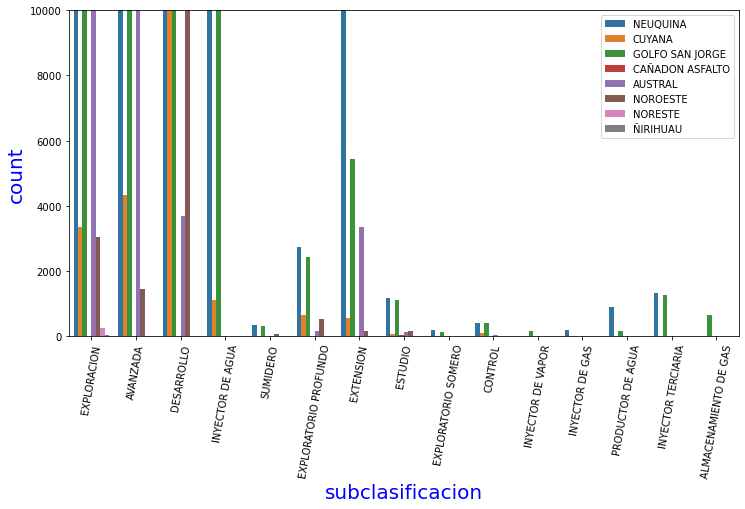

In [307]:
df_count = df
col_x = 'subclasificacion'
hue = 'cuenca'


plt.figure(figsize=(12, 6))
plot=sns.countplot(data=df_count,x=col_x,hue=hue)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.legend(loc='upper right')
plt.ylim(0,10000)
plt.xlabel(col_x,fontsize=20,color='blue')
plt.ylabel('count',fontsize=20,color='blue')
plt.show()


## <font color='#D35400'>sns.histplot (ejemplo 1)</font>
HISTOGRAMA FITRADO UTILIZANDO 2 COLUMNAS  (1 columna utilizando cutoff y 1 valores no nulos)  

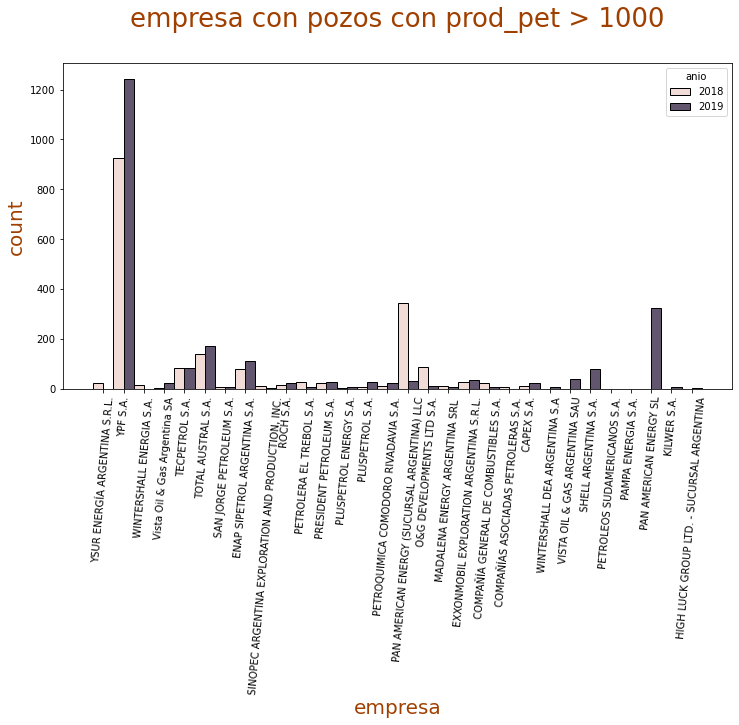

In [258]:
col_cutoff = 'prod_pet'
cutoff = 1000

col_x = 'empresa'
hue = 'anio'

df_hist = df[(df[col_cutoff] > cutoff) & (df[col_x].notnull())]

plt.figure(figsize=(12, 6))
plot=sns.histplot(data=df_hist,x=col_x,hue=hue,multiple="dodge")
plt.setp(plot.get_xticklabels(), rotation=85)
plt.title(f'{col_x} con pozos con {col_cutoff} > {cutoff}\n',fontsize=26,color='#A04000')
plt.xlabel(col_x,fontsize=20,color='#A04000')
plt.ylabel('count',fontsize=20,color='#A04000')
#plt.xticks(ticks=df_hist[df_hist[col_x].notnull()][col_x].unique())

plt.show()

## <font color='#D35400'>sns.histplot (ejemplo 2)</font>
HISTOGRAMA FITRADO UTILIZANDO 3 COLUMNAS  (2 columnas utilizando cutoff y 1 valores no nulos)<br>   
Además de agregar otra columna como filtro, también modifiqué levemente la estética del gráfico utilizando **.title()** en los strings del título del gráfico, y del título del eje x.

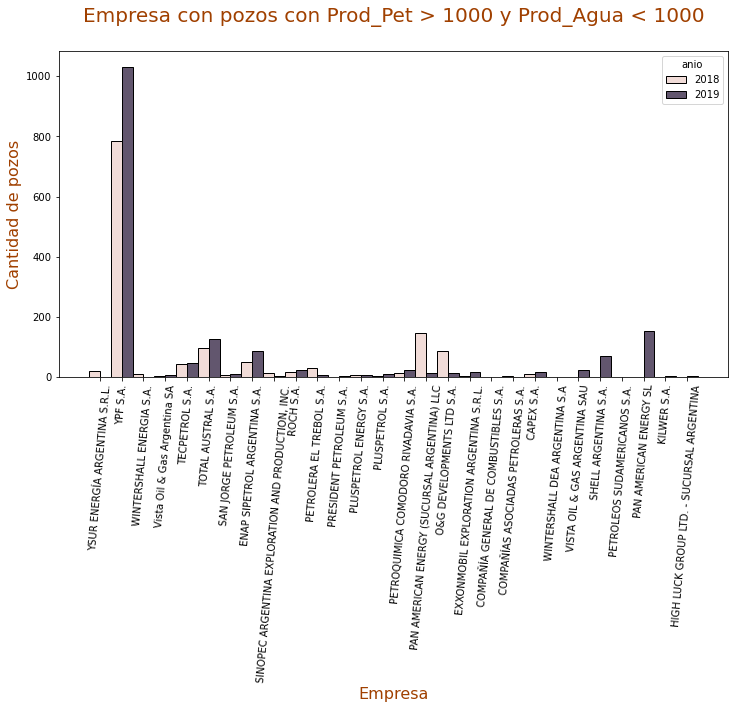

In [257]:
col_cutoff = 'prod_pet'
cutoff = 1000
col2_cutoff = 'prod_agua'
cutoff2 = 1000

col_x = 'empresa'
hue = 'anio'

df_hist = df[(df[col_cutoff] > cutoff) & (df[col2_cutoff] < cutoff2) & (df[col_x].notnull())]

plt.figure(figsize=(12, 6))
plot=sns.histplot(data=df_hist,x=col_x,hue=hue,multiple="dodge")
plt.setp(plot.get_xticklabels(), rotation=85)
plt.title(f'{col_x.title()} con pozos con {col_cutoff.title()} > {cutoff} y {col2_cutoff.title()} < {cutoff2}\n',fontsize=20,color='#A04000')
plt.xlabel(col_x.title(),fontsize=16,color='#A04000')
plt.ylabel('Cantidad de pozos',fontsize=16,color='#A04000')
#plt.xticks(ticks=df_hist[df_hist[col_x].notnull()][col_x].unique())

plt.show()

## <font color='#D35400'>.plot(kind='hist')</font>
HISTOGRAMA **.plot(kind='hist')** DONDE PODEMOS UTILIZAR MULTIPLES **hue** UTILIZANDO **.groupby([col1,col2...])** cuando definimos los datos para graficar.

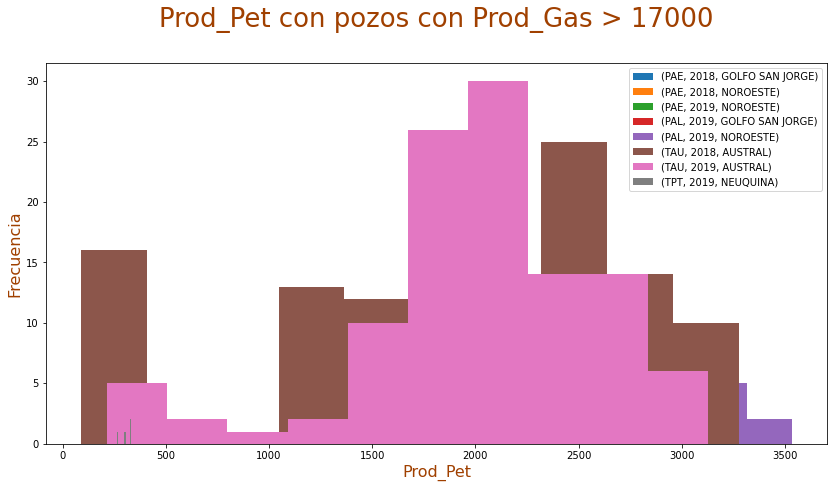

In [402]:
col_cutoff = 'prod_gas'
cutoff = 17000

df_k_hist = df.loc[(df[col_cutoff] > cutoff)].groupby(['idempresa','anio','cuenca'])
col_x = 'prod_pet'

plt.figure(figsize=(14, 7))
df_k_hist[col_x].plot(kind='hist')
plt.title(f'{col_x.title()} con pozos con {col_cutoff.title()} > {cutoff}\n',fontsize=26,color='#A04000')
plt.xlabel(col_x.title(),fontsize=16,color='#A04000')
plt.ylabel('Frecuencia',fontsize=16,color='#A04000')
plt.legend()
plt.show()